## This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.





In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sb
#load data
bike=pd.read_csv('201902-fordgobike-tripdata.csv')

### When are most trips taken in terms of time of day, day of the week, or month of the year?

### How long does the average trip take?

### Does the above depend on if a user is a subscriber or customer?

#  data cleaning 

In [3]:
# descriptive statistics for numeric variables
bike.dropna(inplace =True)
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### check if max duration exceed one day at a time or not 

In [4]:
max_dur= bike['duration_sec'].max()/3600
min_dur= bike['duration_sec'].min()/60
print (' max duration is  ' +  str( max_dur)+  ' hours' )
print (' min duration is  ' +  str( min_dur)+  ' min' )

 max duration is  23.485555555555557 hours
 min duration is  1.0166666666666666 min


In [5]:
# high-level overview of data shape and composition
print(bike.shape)
print(bike.info())
bike.head(10)

(174952, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  floa

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No
10,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes


## Investigation Overview


##### i am interested in finding what affect the durtion of bike sharing 

## features you  need to focus on to  support your investigation 


###### I expect that user gender  will have the strongest effect on duration 
###### I also think that user type and days of week alos at any time per day  may affect the duration

# Univariate Data Visualization

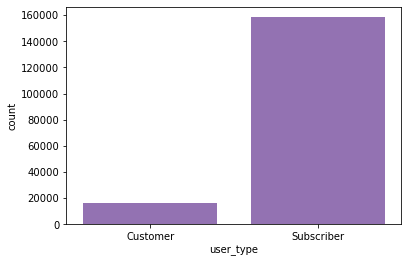

In [6]:
# plot distribution  of user_type                
base_color= sb.color_palette()[4]
sb.countplot(data=bike , x='user_type', color = base_color);


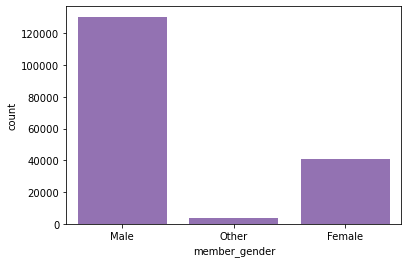

In [7]:
# plot distribution   of gender                 
base_color= sb.color_palette()[4]
sb.countplot(data=bike , x='member_gender', color = base_color);

# average and distrbution of duration 


In [8]:
# average  of duation 
print(bike['duration_sec'].mean())

704.0027436096758


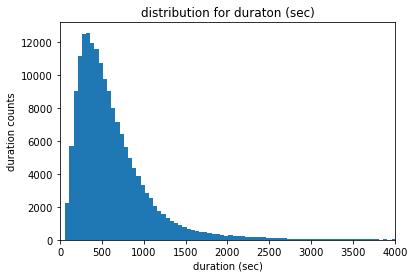

In [9]:

# show distribution for duraton 
duration_bins=np.arange(bike['duration_sec'].min(), bike['duration_sec'].max()+50,50)
plt.hist(data=bike , x='duration_sec', bins=duration_bins);
plt.xlim(0,4000);
plt.xlabel('duration (sec)');
plt.title('distribution for duraton (sec)');
plt.ylabel('duration counts');


## Waht is the average of the duration distribution?
#### it is around 700 ms 
#### also the data is right skwed has majorty between 500 ms and 800 ms 

In [10]:
#create new column contains days to be able to group the duration by day 
bike['start_day']='day'
for i in range(30):
    if i < 10:
        month='2019-02-0'+str(i)
    else :
        month='2019-02-'+str(i)
    d=bike[bike.start_time.str.startswith(month)].index
    bike.loc[d,'start_day']= 'day'+str(i)


In [11]:
#divide day to 8 intervals per a day 
bike.loc[bike[bike.start_time.str.contains(' 12:| 13:| 14:',regex=True)].index,'day_hours']="12|13|14"
bike.loc[bike[bike.start_time.str.contains(' 15:| 16:| 17:',regex=True)].index,'day_hours']="15|16|17"
bike.loc[bike[bike.start_time.str.contains(' 18:| 19:| 20:',regex=True)].index,'day_hours']="18|19|20"
bike.loc[bike[bike.start_time.str.contains(' 21:| 22:| 23:',regex=True)].index,'day_hours']="21|22|23"
bike.loc[bike[bike.start_time.str.contains(' 01:| 02:| 00:',regex=True)].index,'day_hours']="00|01|02"
bike.loc[bike[bike.start_time.str.contains(' 03:| 04:| 05:',regex=True)].index,'day_hours']="03|04|05"
bike.loc[bike[bike.start_time.str.contains(' 06:| 07:| 08:',regex=True)].index,'day_hours']="06|07|08"
bike.loc[bike[bike.start_time.str.contains(' 09:| 10:| 11:',regex=True)].index,'day_hours']="09|10|11"

In [12]:
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,day_hours
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,day28,15|16|17
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,day28,12|13|14
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,day28,15|16|17
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,day28,21|22|23
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,day28,21|22|23


In [13]:
#ordinal the hours 
hours3_ord= ['00|01|02',"03|04|05","06|07|08","09|10|11","12|13|14","15|16|17","18|19|20","21|22|23"]
ords=pd.api.types.CategoricalDtype(ordered= True , categories=hours3_ord)
bike['day_hours']=bike['day_hours'].astype(ords)

### plot distrbution of duration per each 3 hours intervals per a day 
   

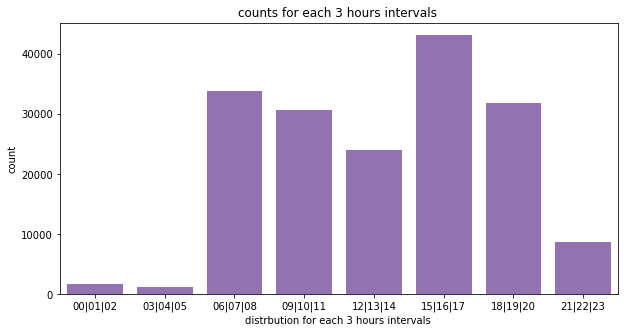

In [22]:
#plot distrbution of duration per each 3 hours intervals per a day 
plt.figure(figsize=[10,5])
sb.countplot(data=bike , x='day_hours', color =base_color );
plt.title('counts for each 3 hours intervals ')
plt.xlabel('distrbution for each 3 hours intervals ');

### at which time in aday  number of  user needs a bike is max  ? and is the most user male or female , customer or subscriber ?
##### we can find that the best time the user need  a bike is form 6 :11  at morning ,and  form  15:20  
##### also number of mens are greater then womens also subscriber type is the most  user type 

# Bivariate Exploration

In [23]:
#set bin size for duration distrbution
day_duration_bins=np.arange(bike['duration_sec'].min(), bike['duration_sec'].max()+100,100)

### find distrbution of duration per a day for all the month  also per hours throght a day 

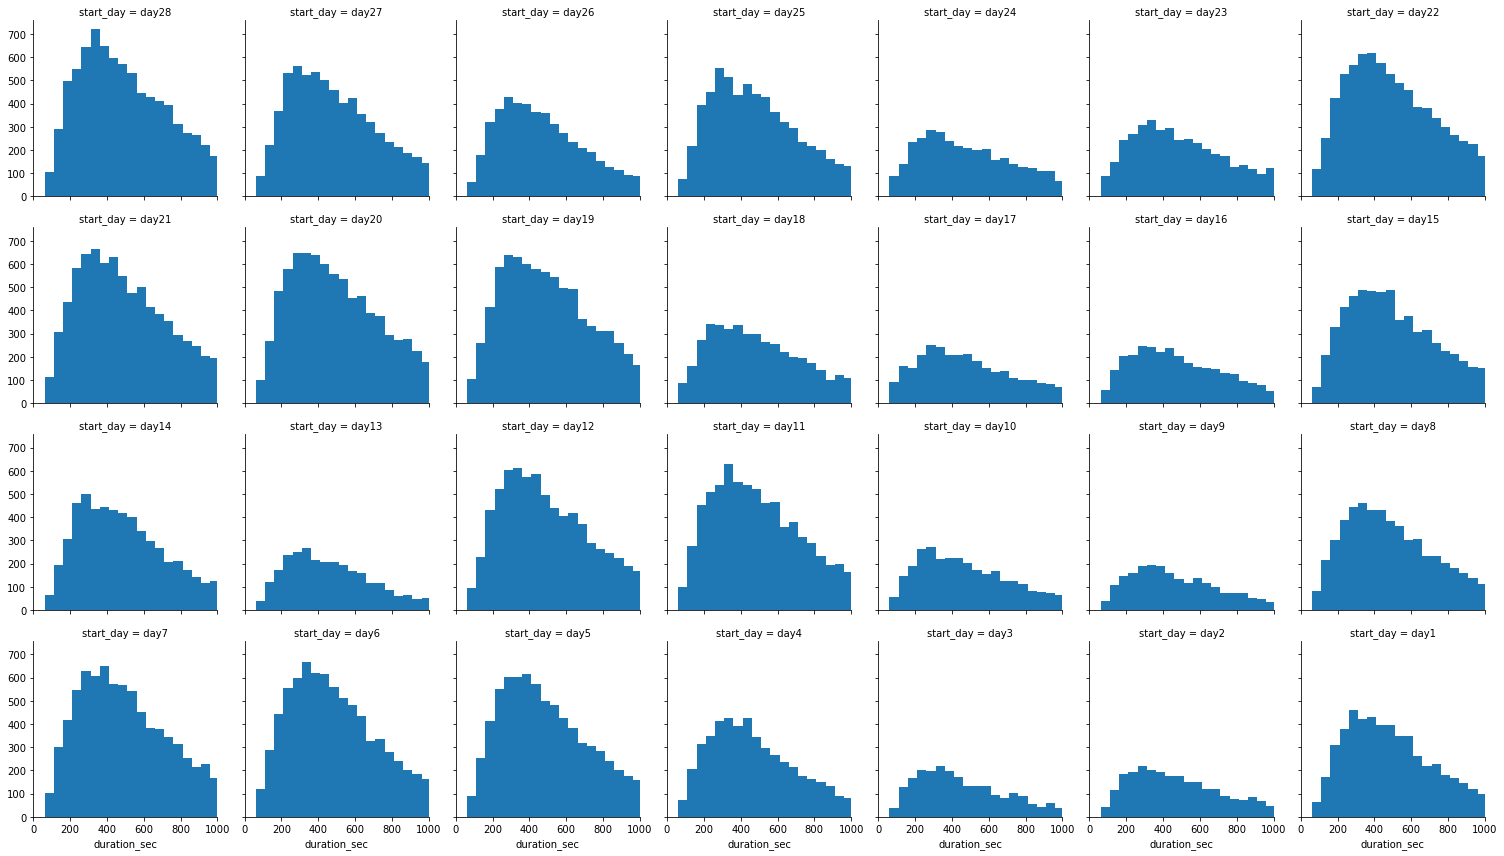

In [24]:
## plot matrix of duration_sec features against days features.
g=sb.FacetGrid(data=bike , col='start_day', col_wrap=7)
g.set(xlim=(0,1000))
g.map(plt.hist , 'duration_sec' , bins=duration_bins);

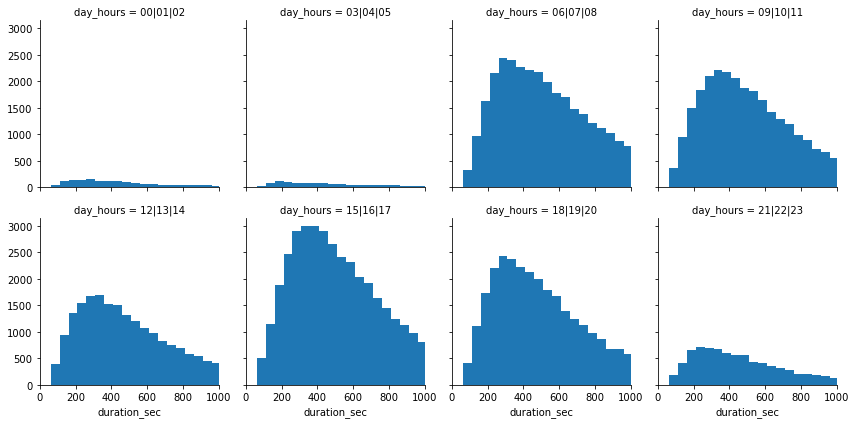

In [29]:
## plot matrix of duration_sec features against horus per day  features.
g=sb.FacetGrid(data=bike , col='day_hours', col_wrap=4)
g.set(xlim=(0,1000))
g.map(plt.hist , 'duration_sec' , bins=duration_bins);

### which days in month that have long time for bike sharing , also at which time in aday? 
#### the best time per a day is form 15 :17 at mind of the day  , almost in 3  days at the end of the week

In [16]:
nvar=['duration_sec','member_birth_year']
cat=['member_gender','user_type','start_day','day_hours']

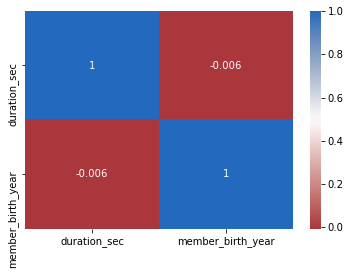

In [17]:
# correlation plot
sb.heatmap(data= bike[nvar].corr(), cmap = 'vlag_r',annot=True );

##### no relation between year of birth and duration 

#### realtion between duration_sec vs [member_gender , user_type, start_day, day_hours ]

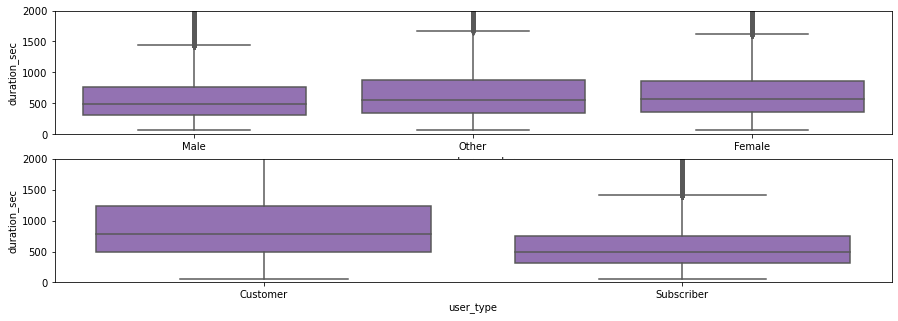

In [18]:
fig,ax=plt.subplots(nrows=2, figsize=[15,5])
for i in range(2):
    var=cat[i]
    sb.boxplot(data=bike , x= var, y= 'duration_sec' ,color =base_color, ax=ax[i])
    ax[i].set_ylim(0,2000)

## what is the distrbution of duration for gender and user type feactures ?
### also most of the user is subscriber type 
### but the distrbution for duration is less than compare with the duration distrbution for customer type
### the same thing for male duration distrbution is less than female desbite male > female

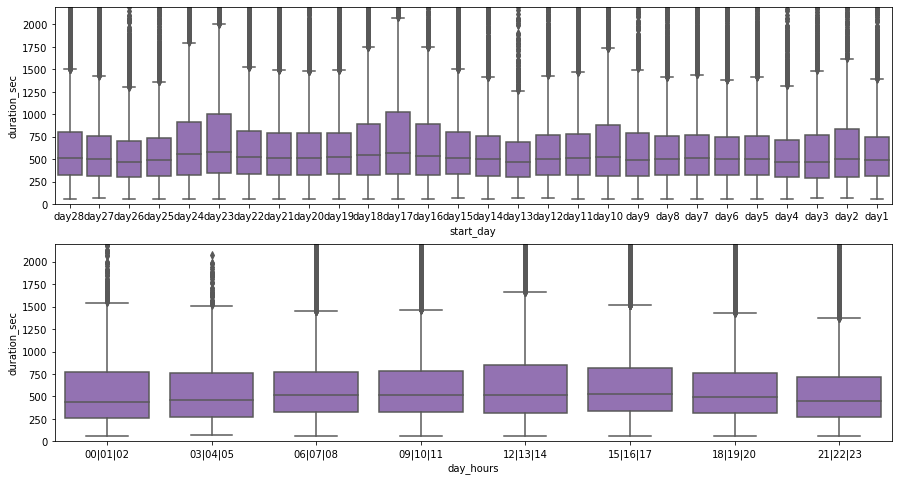

In [19]:
fig,ax=plt.subplots(nrows=2, figsize=[15,8])
for i in range(2,4):
    var=cat[i]
    sb.boxplot(data=bike , x= var, y= 'duration_sec' ,color =base_color, ax=ax[i-2])
    ax[i-2].set_ylim(0,2200)


### what is the day has the bigest duration distrbution?what is the time interval per a day has the bigest duration distrbution?
#### days (10-02-2019, 17-02-2019, 18-02-2019, 23-02-2019 ,24-02-2019)
#### intervals form (12 : 14)

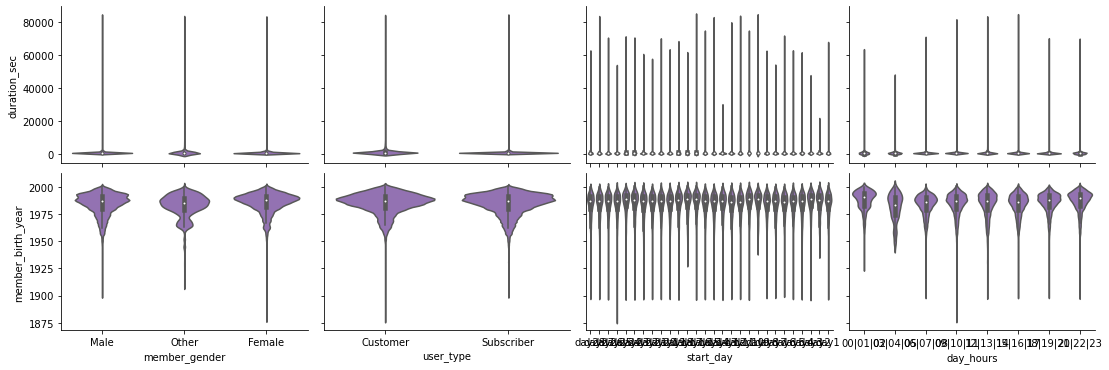

In [20]:
# plot matrix of numeric features against categorical features.

def violin(x, y, **kwargs):
    base_color = sb.color_palette()[4]
    sb.violinplot(x, y, color = base_color)
    
g = sb.PairGrid(data = bike, y_vars = nvar, x_vars = cat,  aspect =1.5)
g.map(violin );


### Finally, let's look at relationships between the categorical features.

#####   distrbutions for time intervals per day  also distrbution for user typer per gender 


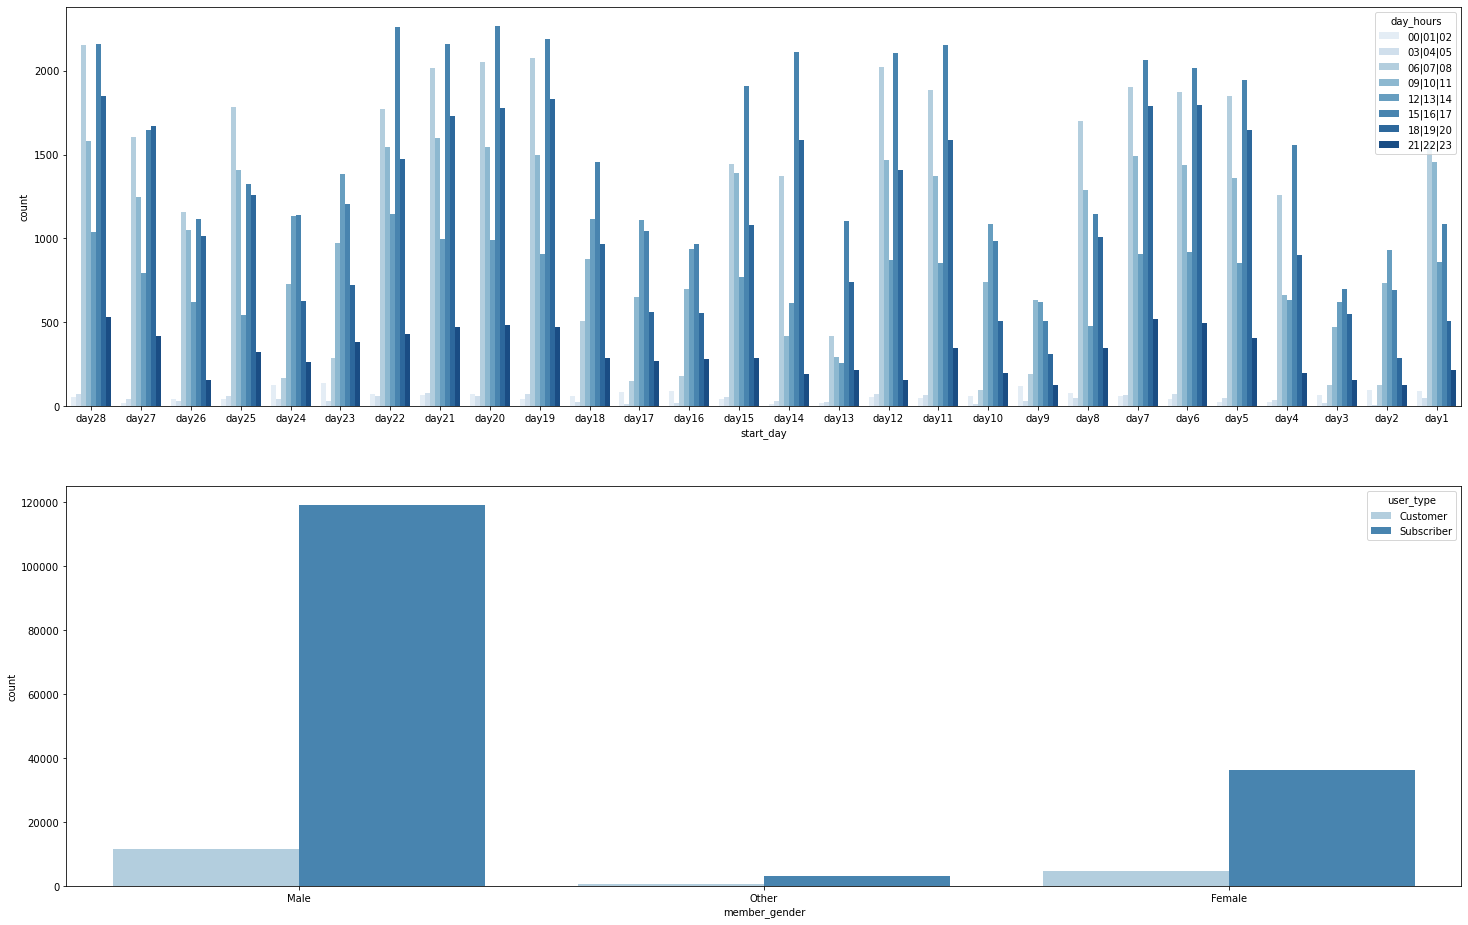

In [24]:
plt.figure(figsize = [25, 25])

# subplot 1: day_hours  vs day 
plt.subplot(3, 1, 1)
sb.countplot(data = bike, x = 'start_day', hue = 'day_hours',palette = 'Blues')

# subplot 2: user type   vs gender 
plt.subplot(3, 1, 2)
sb.countplot(data = bike, x = 'member_gender', hue = 'user_type', palette = 'Blues');

#####  Duration distributions appear to gradually increase and then gradually decrease approximately every 7 days
##### the max Duration values at  dates (2019-02-17 ,2019-02-18 ,2019-02-19 )
#### almost all males and female are subscriber  type  also males is greater than females 

# Multivariate Exploration

### plot duration distrbution for ervey day   with  3 hours per day 


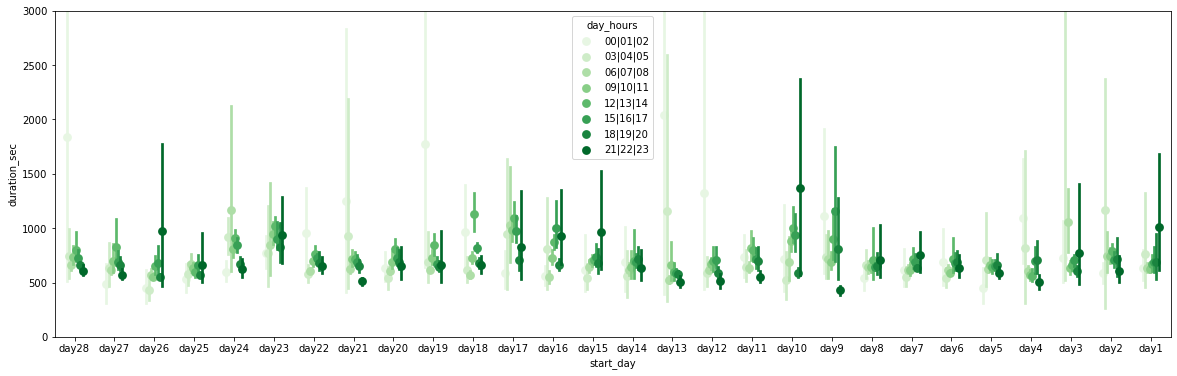

In [27]:
#plot duration distrbution for ervey day per  with each 3 hourd per day 
fig = plt.figure(figsize = [20,6])
sb.pointplot(data = bike, x = 'start_day', y = 'duration_sec', hue = 'day_hours',
           palette = 'Greens', linestyles = '', dodge = 0.4)
plt.ylim(0,3000);

## what is the relation of duration and numeric features days of months and hours of day?
##### the max Duration values at  dates (2019-02-17 ,2019-02-18 ,2019-02-19 ) with less values at this  time interval (22 | 22 | 23)  


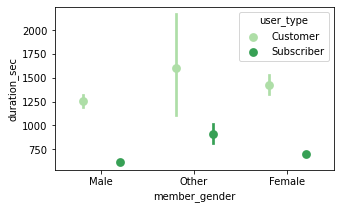

In [28]:
#plot duration distrbution for ervey day per  with each 3 hourd per day 
fig = plt.figure(figsize = [5,3])
sb.pointplot(data = bike, x = 'member_gender', hue = 'user_type', y = 'duration_sec',
           palette = 'Greens', linestyles = '', dodge = 0.4);


### what is the relation between duration and to categoricals feature of user type and gender ?
### customer has higher values of duration  for all type of gender 
### when gender is not female or male there is few customer type 